# Do customers have a prefered yogurt?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Yogurt = pd.read_csv("./.kaggle_data/Rdatasets/Yogurt.csv").drop("Unnamed: 0",axis=1)

In [3]:
Yogurt.head(n=10)

,id,feat.yoplait,feat.dannon,feat.hiland,feat.weight,price.yoplait,price.dannon,price.hiland,price.weight,choice
0,1,0,0,0,0,10.8,8.1,6.1,7.9,weight
1,1,0,0,0,0,10.8,9.8,6.4,7.5,dannon
2,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
3,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
4,1,0,0,0,0,12.5,9.8,4.9,7.9,dannon
5,1,0,0,0,0,10.8,9.2,5.0,7.9,dannon
6,1,0,0,0,0,10.3,8.1,4.9,7.9,dannon
7,1,0,0,0,0,10.8,8.6,5.4,7.9,weight
8,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait
9,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait


In [5]:
brands = ['dannon', 'hiland', 'weight', 'yoplait']
def customer(n): return Yogurt[Yogurt["id"] == n]
def number_of_purchases(n,yogurt): return (customer(n)["choice"] == yogurt).sum()
def customer_purchase_bar(n): return [number_of_purchases(n,yogurt) for yogurt in brands]
def customer_to_grid(n): return [(i,j) for i in range(10) for j in range(10)][n]

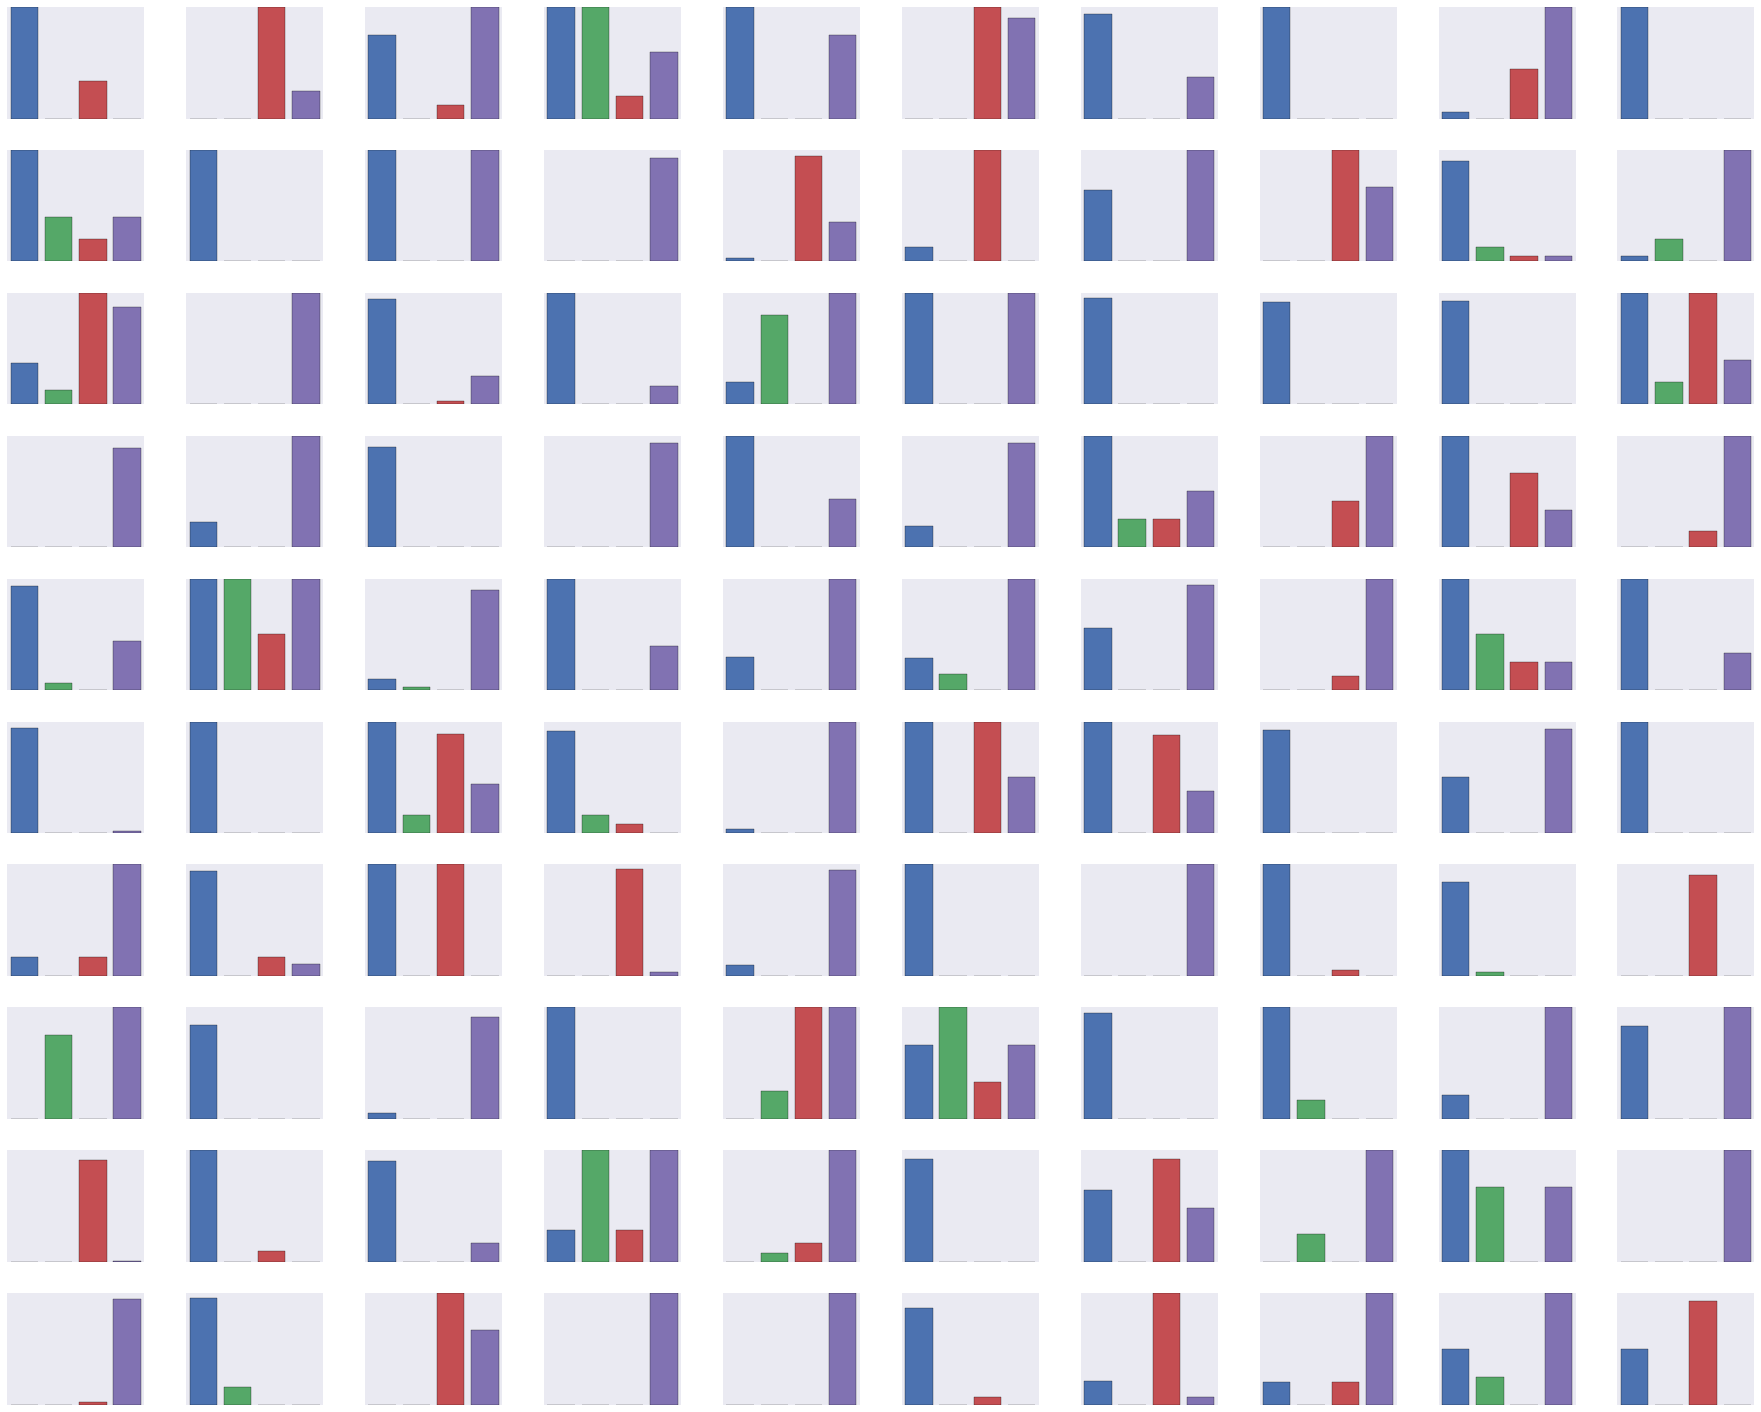

In [7]:
colors = sns.color_palette()
xticks = [0,1,2,3]

f, ax = plt.subplots(10,10,figsize=(25, 20))
f.tight_layout()
for n in range(100):
    i = customer_to_grid(n)[0]
    j = customer_to_grid(n)[1]
    ax[i,j].bar(xticks,customer_purchase_bar(n+1),align='center',color=colors)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
plt.show()

The barplots shows the number of times each customer purchases each type of yogurt. The barplots in this diagram are normalized. This is necessary because some customers purchase a lot more yogurt than others. The colors are: 

- blue = dannon
- green = hiland
- red = weight
- purple = yoplait

given a customer, if their emperical purchase distrubution has low entropy, it indicates that they prefer a specific brand. The maximum entropy for a customer is 2 (which occours when the customer purchases equal amounts of every yogurt).

In [8]:
#the random 0.0000001 is to deal with customers who don't purchase any units of a specific brand
def emperical_entropy(purchase_freq):
    x = ((purchase_freq / purchase_freq.sum()) + 0.0000001)
    return -(x * np.log2(x)).sum()

In [9]:
customer_entropy = np.array([emperical_entropy(np.array(customer_purchase_bar(n+1))) for n in range(100)])

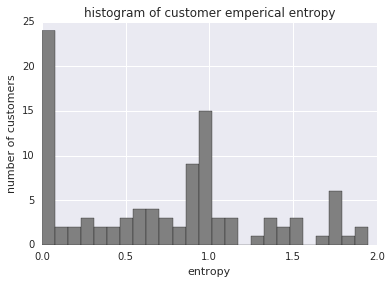

In [17]:
plt.hist(customer_entropy,bins=25,color='grey')
plt.xlabel("entropy")
plt.ylabel("number of customers")
plt.title("histogram of customer emperical entropy")
plt.show()

The peak at 0 corresponds to customers who mostly purchase one type of yogurt. The Peak at 1 corresponds to customers who mostly purchase two types of yogurt.